# Data Visualization for Categorical Predictors

In [2]:
#We will import the library pandas to use all the functions necessary
import pandas as pd

In [3]:
# Now we will import the database using the function to read csv
# Also we use the parameter encoding with cp1252 because is the codification that the csv use
# And we will save the information in a dataframe called disease_df
disease_df=pd.read_csv("cardiovascular_disease.csv",encoding='cp1252')

C:\Users\Z20235\AppData\Local\Temp\ipykernel_29596\1001357391.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  disease_df=pd.read_csv("cardiovascular_disease.csv",encoding='cp1252')


# EDA

In [5]:
# Let's see the size of the data base in rows and columns
disease_df.shape

(308854, 19)

In [6]:
# We will check the null and blank values
print('The number of null values by column is:\n', disease_df.isnull().sum())
blank_values = disease_df.apply(lambda x: (x == "").sum())
print('\nThe number of blank values by column is:\n', blank_values)

The number of null values by column is:
 General_Health                     0
Checkup                            0
Exercise                         101
Heart Disease                      0
Skin Cancer                        0
Other Cancer                       0
Depression                      3088
Diabetes                           0
Arthritis                          0
Sex                                0
Age Category                       0
Height (cm)                        0
Weight (kg)                        0
BMI                                0
Smoking History                    0
Alcohol Consumption                0
Fruit Consumption                  0
Green_Vegetables_Consumption       0
FriedPotato Consumption            0
dtype: int64

The number of blank values by column is:
 General_Health                  0
Checkup                         0
Exercise                        0
Heart Disease                   0
Skin Cancer                     0
Other Cancer                  

In [7]:
#We will eliminate the null values
disease_df = disease_df.dropna()

print('The number of null values is', disease_df.isnull().sum())

The number of null values is General_Health                  0
Checkup                         0
Exercise                        0
Heart Disease                   0
Skin Cancer                     0
Other Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age Category                    0
Height (cm)                     0
Weight (kg)                     0
BMI                             0
Smoking History                 0
Alcohol Consumption             0
Fruit Consumption               0
Green_Vegetables_Consumption    0
FriedPotato Consumption         0
dtype: int64


In [8]:
# To check if there are values that does not correspond to the variable description we will check the unique values of each column
for column in disease_df.columns:
    uniquevalues = disease_df[column].unique()
    print(f"The unique values in '{column}' are:\n", uniquevalues, "\n")

The unique values in 'General_Health' are:
 ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent'] 

The unique values in 'Checkup' are:
 ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never'] 

The unique values in 'Exercise' are:
 ['No' 'Yes'] 

The unique values in 'Heart Disease' are:
 ['No' 'Yes' 'e'] 

The unique values in 'Skin Cancer' are:
 ['No' 'Yes' 'dsfg' 'wet' '12*lkl–«fg' 'q345345' 'serter-89' 'dfg 025'
 'dfgkl–fg-' 'sertret-8'] 

The unique values in 'Other Cancer' are:
 ['No' 'Yes' 'dsgw45'] 

The unique values in 'Depression' are:
 ['No' 'Yes'] 

The unique values in 'Diabetes' are:
 ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy'] 

The unique values in 'Arthritis' are:
 ['Yes' 'No'] 

The unique values in 'Sex' are:
 ['Female' 'Male' 'Non-Binary'] 

The unique values in 'Age Category' are:
 ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '3

In [9]:
# Filter out incorrect values in categorical columns

# Heart Disease: remove rows where 'Heart Disease' equals 'e'
disease_df = disease_df[disease_df['Heart Disease'] != 'e']


# Skin Cancer: remove rows with specific incorrect values
# Convert all values to lowercase and strip any extra whitespace for consistency
disease_df['Skin Cancer'] = disease_df['Skin Cancer'].str.strip().str.lower()

# Redefine the list of unwanted values in lowercase
invalid_skin_cancer_values = ['dsfg', 'wet', '12*lkl–«fg', 'q345345', 'serter-89', 'dfg 025', 'dfgkl–fg-', 'sertret-8', '12*lk1-«fg', 'dfgkl-fg-']

# Remove rows where 'Skin Cancer' is in the invalid values list
disease_df = disease_df[~disease_df['Skin Cancer'].isin(invalid_skin_cancer_values)]

# After filtering, standardize 'no' and 'yes' to 'No' and 'Yes' for consistency
disease_df['Skin Cancer'] = disease_df['Skin Cancer'].replace({'no': 'No', 'yes': 'Yes'})



# Other Cancer: remove rows where 'Other Cancer' equals 'dsgw45'
disease_df = disease_df[disease_df['Other Cancer'] != 'dsgw45']

# Fruit Consumption: remove rows with 'Yes' or 'No' values
disease_df = disease_df[~disease_df['Fruit Consumption'].isin(['Yes', 'No'])]

# Ensure all remaining values in 'Fruit Consumption' are numeric, then convert to int
# This step will remove any rows in 'Fruit Consumption' that are not numeric
disease_df = disease_df[pd.to_numeric(disease_df['Fruit Consumption'], errors='coerce').notnull()]
disease_df['Fruit Consumption'] = disease_df['Fruit Consumption'].astype(int)


In [10]:
#Lets check if we erase it 
for column in disease_df.columns:
    uniquevalues = disease_df[column].unique()
    print(f"The unique values in '{column}' are:\n", uniquevalues, "\n")

The unique values in 'General_Health' are:
 ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent'] 

The unique values in 'Checkup' are:
 ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never'] 

The unique values in 'Exercise' are:
 ['No' 'Yes'] 

The unique values in 'Heart Disease' are:
 ['No' 'Yes'] 

The unique values in 'Skin Cancer' are:
 ['No' 'Yes'] 

The unique values in 'Other Cancer' are:
 ['No' 'Yes'] 

The unique values in 'Depression' are:
 ['No' 'Yes'] 

The unique values in 'Diabetes' are:
 ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy'] 

The unique values in 'Arthritis' are:
 ['Yes' 'No'] 

The unique values in 'Sex' are:
 ['Female' 'Male' 'Non-Binary'] 

The unique values in 'Age Category' are:
 ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29'] 

The unique values in 'Height (cm)' are:
 [150 165 163 180 191 183 175 1

In [11]:
print(disease_df.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Heart Disease                    object
Skin Cancer                      object
Other Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age Category                     object
Height (cm)                       int64
Weight (kg)                     float64
BMI                             float64
Smoking History                  object
Alcohol Consumption               int64
Fruit Consumption                 int32
Green_Vegetables_Consumption      int64
FriedPotato Consumption           int64
dtype: object


In [12]:
# Convert columns to the appropriate data types

# Convert categorical columns to 'category' type for efficient storage
categorical_columns = [
    'General_Health', 'Exercise', 'Checkup', 'Heart Disease', 'Skin Cancer', 'Other Cancer', 
    'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age Category', 'Smoking History'
]
for col in categorical_columns:
    disease_df[col] = disease_df[col].astype('category')

# Convert integer columns to 'int32' for memory efficiency
integer_columns = [
    'Alcohol Consumption', 'Fruit Consumption', 
    'Green_Vegetables_Consumption', 'FriedPotato Consumption'
]
for col in integer_columns:
    disease_df[col] = disease_df[col].astype('int32')

# Convert float columns to 'float64' for precision
float_columns = ['Height (cm)', 'Weight (kg)', 'BMI']
for col in float_columns:
    disease_df[col] = disease_df[col].astype('float64')

# Verify the changes
print(disease_df.dtypes)


General_Health                  category
Checkup                         category
Exercise                        category
Heart Disease                   category
Skin Cancer                     category
Other Cancer                    category
Depression                      category
Diabetes                        category
Arthritis                       category
Sex                             category
Age Category                    category
Height (cm)                      float64
Weight (kg)                      float64
BMI                              float64
Smoking History                 category
Alcohol Consumption                int32
Fruit Consumption                  int32
Green_Vegetables_Consumption       int32
FriedPotato Consumption            int32
dtype: object


In [13]:
#Just in case we will check that we still have values 
for column in disease_df.columns:
    uniquevalues = disease_df[column].unique()
    print(f"The unique values in '{column}' are:\n", uniquevalues, "\n")

The unique values in 'General_Health' are:
 ['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
Categories (5, object): ['Excellent', 'Fair', 'Good', 'Poor', 'Very Good'] 

The unique values in 'Checkup' are:
 ['Within the past 2 years', 'Within the past year', '5 or more years ago', 'Within the past 5 years', 'Never']
Categories (5, object): ['5 or more years ago', 'Never', 'Within the past 2 years', 'Within the past 5 years', 'Within the past year'] 

The unique values in 'Exercise' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Heart Disease' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Skin Cancer' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Other Cancer' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Depression' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Diabetes' are:
 ['No', 'Yes', 'No, pre-diabetes

### 1.2 Detail the criteria used to detect outliers, and how where the outliers and null values handled (if applicable): What was done with them? Why? etc.

To detect outliers, we applied the interquartile range (IQR) criterion. This method identifies outliers by first calculating the IQR, which is the difference between the third quartile (Q3) and the first quartile (Q1). Next, we define the boundaries for data we consider atypical: the lower limit is calculated as Q1 - 1.5 x IQR, and the upper limit as Q3 + 1.5 x IQR. Any values outside this range are classified as outliers and are removed, as they may represent unrealistic measurements—such as a BMI of 4000, which could be due to measurement errors—or uncommon values, like extreme heights, that could interfere with the algorithm’s training by introducing anomalous cases.

References: Pandas Documentation. (n.d.). pandas.DataFrame.quantile. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html

### Atypical Values

In [18]:
# Now we will look for outliers and atypical values
# For this we will use the interquartile range (IQR) rule, with this rule we will identify the atypical values and eliminate them

# First we will call the numpy library
import numpy as np

#WEIGHT COLUMN 

# And with the continuos variables we will calculate the quartiles and the IQR
#for var in continuos_vars:
Q1 = disease_df['Weight (kg)'].quantile(0.25)
Q3 = disease_df['Weight (kg)'].quantile(0.75)

    # Now we will calculate the interquartile range
IQR = Q3 - Q1

    # Define the limits 
lowlimit = Q1 - 2.5 * IQR
uplimit = Q3 + 2.5 * IQR

    # And now that we have the limits we will determine the outliers seeing which values are not between the limits
outliers = disease_df[(disease_df['Weight (kg)'] < lowlimit) | (disease_df['Weight (kg)'] > uplimit)]

print('\n', 'Weight (kg)' + ':')

    # Here we will get the unique values in the outliers
print(outliers['Weight (kg)'].unique())

    # And the count of the outliers
print(outliers['Weight (kg)'].value_counts().sum(), 'is the number of atypical values in the column', 'Weight (kg)')


print('The low limit is:',lowlimit)
print('The upper limit is:',uplimit)




 Weight (kg):
[167.83 176.9  170.1  175.54 172.37 181.44 163.29 208.65 169.19 228.16
 166.92 174.63 235.87 165.56 228.61 204.12 185.97 189.15 164.2  226.8
 190.51 188.24 199.58 165.11 187.79 168.28 166.01 213.19 210.92 224.53
 179.17 176.45 209.56 217.72 219.99 183.25 183.7  272.16 171.46 206.84
 200.   180.53 215.46 175.99 166.47 184.61 174.18 186.43 195.04 201.85
 192.78 191.87 272.61 231.33 194.59 179.62 210.47 180.98 169.64 285.76
 177.81 167.38 244.03 163.75 168.74 173.27 227.7  200.94 229.52 219.54
 232.69 175.09 229.97 293.02 200.49 195.95 190.96 212.73 229.06 178.72
 181.89 171.   176.   254.01 249.48 240.4  238.14 205.93 273.52 215.
 187.33 182.   164.65 233.6  199.13 185.07 216.36 186.88 189.6  173.73
 219.09 203.21 210.01 190.06 197.31 180.08 222.26 202.76 206.38 170.55
 188.69 177.35 195.   172.82 220.45 184.16 185.52 274.42 207.75 180.
 175.   230.88 222.71 258.55 203.66 182.34 195.5  191.42 215.91 178.26
 257.64 244.94 263.08 214.1  172.   185.   247.21 193.68 250.   252

In [19]:
#Lets eliminate this atypical values
disease_df = disease_df.drop(disease_df[(disease_df['Weight (kg)'] < 0.01500000000002899) | (disease_df['Weight (kg)'] > 163.27499999999998)].index)

In [20]:
#Now we will check if this worked
outlierscount = disease_df[(disease_df['Weight (kg)'] < lowlimit) | (disease_df['Weight (kg)'] > uplimit)].shape[0]
print("The count of atypical values in 'Weight (kg)' is:", outlierscount)

The count of atypical values in 'Weight (kg)' is: 0


In [21]:
#BMI Column

#Calculate the quartiles
Q1 = disease_df['BMI'].quantile(0.25)
Q3 = disease_df['BMI'].quantile(0.75)

    # We will calculate the interquartile range
IQR = Q3 - Q1

    # Define the limits
lowlimit = Q1 - 2.5 * IQR
uplimit = Q3 + 2.5 * IQR

    # And now that we have the limits we will determine the outliers seeing which values are not between the limits
outliers = disease_df[(disease_df['BMI'] < lowlimit) | (disease_df['BMI'] > uplimit)]

print('\n', 'BMI' + ':')

    # Here we will get the unique values in the outliers
print(outliers['BMI'].unique())

    # And the count of the outliers
print(outliers['BMI'].value_counts().sum(), 'is the number of atypical values in the column', 'BMI')


print('The low limit is:',lowlimit)
print('The upper limit is:',uplimit)



 BMI:
[  51.19   50.9    51.69   51.81   51.21   56.07   51.84   61.11   52.9
   63.47   52.51   52.15   51.68   51.49   53.04   53.26   53.14   53.96
   55.45   55.62   54.69   53.25   52.01   54.08   55.44   55.79   57.57
   51.37   56.64   58.59   58.24   58.53   53.67   50.75   60.08   51.75
   60.36   51.67   90.21   52.46   54.03   51.92   59.22   59.44   52.25
   51.08   54.14   51.59   65.91   52.75   74.68   54.87   54.91   56.58
   51.77   56.49   55.25   56.31   66.88   57.41   70.76   54.88   53.47
   56.7    51.15   52.3    81.71   54.38   52.73   53.22   59.5    55.51
   53.71   70.33   64.93   54.93   55.8    50.78   58.58   52.61   54.32
   50.64   57.29   78.17   53.59   52.26   54.61   51.7    57.25   51.97
   62.19   55.61   53.55   50.84   74.06   98.44   54.58   62.07   51.09
   57.6    51.65   51.02   62.     56.43   51.38   68.35   61.71   62.7
   53.21   54.75   55.97   55.24   58.98   52.86   51.96   51.3    68.67
   60.84   50.66   58.52   51.42   54.23   56.

In [22]:
#Lets eliminate the atypical values in BMI
disease_df = disease_df.drop(disease_df[(disease_df['BMI'] < 5.360000000000003) | (disease_df['BMI'] > 50.599999999999994 )].index)

In [23]:
#Now we will check if this worked
outlierscount = disease_df[(disease_df['BMI'] < 5.360000000000003) | (disease_df['BMI'] > 50.599999999999994)].shape[0]
print("The count of atypical values in 'BMI' is:", outlierscount)

The count of atypical values in 'BMI' is: 0


In [24]:
#HEIGHT COLUMN

#Finally we will do the same with the category of height that can also have outliers
Q1 = disease_df['Height (cm)'].quantile(0.25)
Q3 = disease_df['Height (cm)'].quantile(0.75)

# We will calculate the interquartile range
IQR = Q3 - Q1

# Define the limits
lowlimit = Q1 - 2.5 * IQR
uplimit = Q3 + 2.5 * IQR

# And now that we have the limits we will determine the outliers seeing which values are not between the limits
outliers = disease_df[(disease_df['Height (cm)'] < lowlimit) | (disease_df['Height (cm)'] > uplimit)]

print('\n', 'Height (cm)' + ':')

# Here we will get the unique values in the outliers
print(outliers['Height (cm)'].unique())

# And the count of the outliers
print(outliers['Height (cm)'].value_counts().sum(), 'is the number of atypical values in the column Height (cm)')

# Print the limits
print('The low limit is:',lowlimit)
print('The upper limit is:',uplimit)



 Height (cm):
[218. 124. 122. 224. 229. 365. 104. 226. 125. 234.  91. 119. 120. 221.
 105. 216. 107. 117. 102. 241. 115. 106.]
152 is the number of atypical values in the column Height (cm)
The low limit is: 125.5
The upper limit is: 215.5


In [25]:
#Lets eliminate this atypical values
disease_df = disease_df.drop(disease_df[(disease_df['Height (cm)'] < 125.5) | (disease_df['Height (cm)'] > 215.5)].index)

In [26]:
#Now we will check if this worked
outlierscount = disease_df[(disease_df['Height (cm)'] < 125.5) | (disease_df['Height (cm)'] > 215.5)].shape[0]
print("The count of atypical values in Height (cm) is:", outlierscount)

The count of atypical values in Height (cm) is: 0


In [27]:
#We will eliminate the null values
disease_df = disease_df.dropna()

print('The number of null values is', disease_df.isnull().sum())

The number of null values is General_Health                  0
Checkup                         0
Exercise                        0
Heart Disease                   0
Skin Cancer                     0
Other Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age Category                    0
Height (cm)                     0
Weight (kg)                     0
BMI                             0
Smoking History                 0
Alcohol Consumption             0
Fruit Consumption               0
Green_Vegetables_Consumption    0
FriedPotato Consumption         0
dtype: int64


In [28]:
# Let's see the size of the data base in rows and columns, after the cleaning
disease_df.shape

(302513, 19)

In [29]:
#Lets check the unique values again.
for column in disease_df.columns:
    uniquevalues = disease_df[column].unique()
    print(f"The unique values in '{column}' are:\n", uniquevalues, "\n")

The unique values in 'General_Health' are:
 ['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
Categories (5, object): ['Excellent', 'Fair', 'Good', 'Poor', 'Very Good'] 

The unique values in 'Checkup' are:
 ['Within the past 2 years', 'Within the past year', '5 or more years ago', 'Within the past 5 years', 'Never']
Categories (5, object): ['5 or more years ago', 'Never', 'Within the past 2 years', 'Within the past 5 years', 'Within the past year'] 

The unique values in 'Exercise' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Heart Disease' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Skin Cancer' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Other Cancer' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Depression' are:
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

The unique values in 'Diabetes' are:
 ['No', 'Yes', 'No, pre-diabetes

### 1.3 Explore the correlation between variables. Which variables seem to affect more the response variable and how?

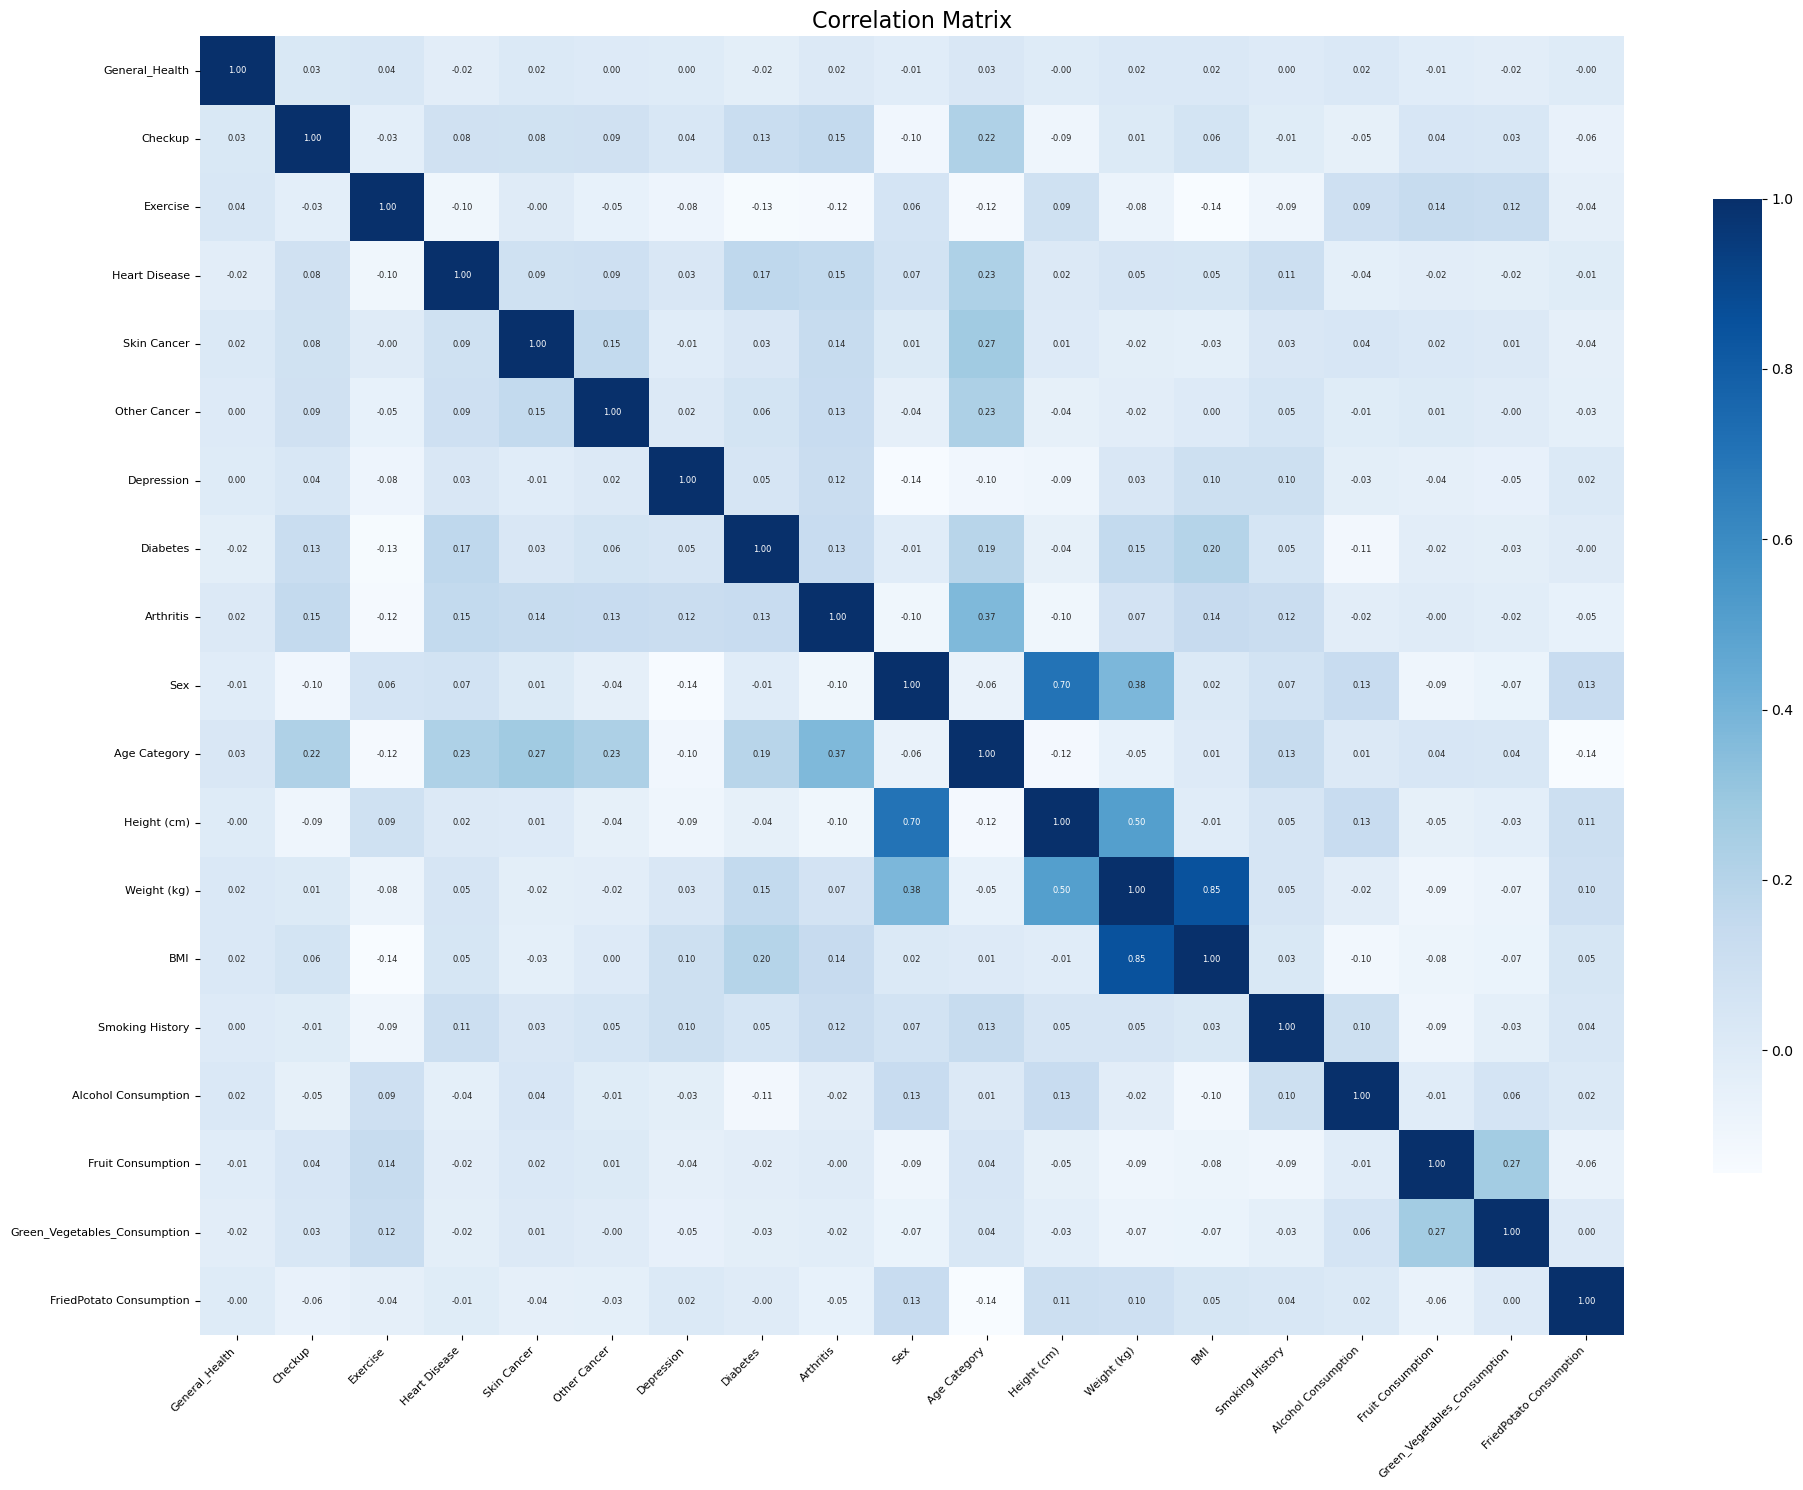

In [31]:
#To see the correlation we will start importing libraries that help us in the data visualization graphics
import seaborn as sns
import matplotlib.pyplot as plt

#We will have to change the category of some columns so we don't want that this change our original data frame so we will create a copy
disease_dfcopy=disease_df.copy(deep=True)

#We will group all the the categorical columns in one list for facilitate the way of work
categoricalvals = disease_dfcopy.select_dtypes(include=['category']).columns

#We will asing a ordinal number code to each unique value of this categories, to transform the text values
#to number to be abble to calculate the correlation
for col in categoricalvals:
    disease_dfcopy[col] = disease_dfcopy[col].astype('category').cat.codes

# Now that we have change all the variables we will create a graphic that ilustrate the correlation matrix
plt.figure(figsize=(20, 15))
#Here we calculate the correlation 
correlation = disease_dfcopy.corr()

#In here we will create a heat map that will helps us to identify in a easy way the correlation table
sns.heatmap(correlation, annot=True, cmap="Blues", fmt='.2f', annot_kws={"size": 6}, cbar_kws={"shrink": 0.75})
#We will put the labels in the axis
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
#The tittle of the heat map
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


The variables that seem to affect more the responsse variable are:
- BMI with Weight (kg): 0.85 of correlation
- Height (cm) with Sex: 0.70 of correlation
- Height (cm) with Weight (kg): 0.50 of correlation

### 1.4 Data visualization: Visualize all predictor variables and analyze its distributions using appropriate visualization methods. Analyze the distribution of the response variable.

### Numerical Predictors

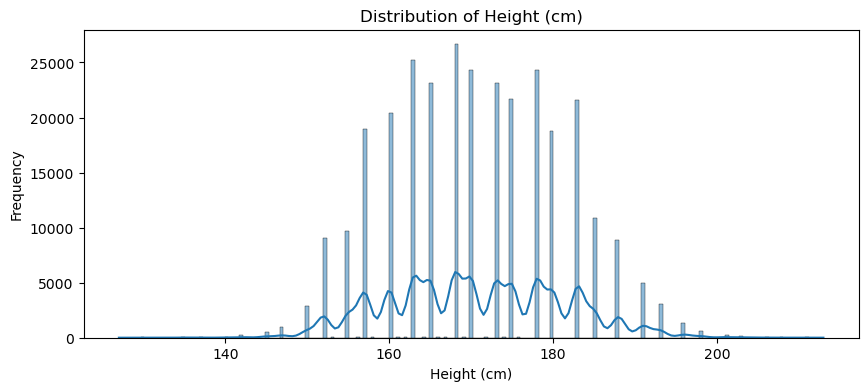

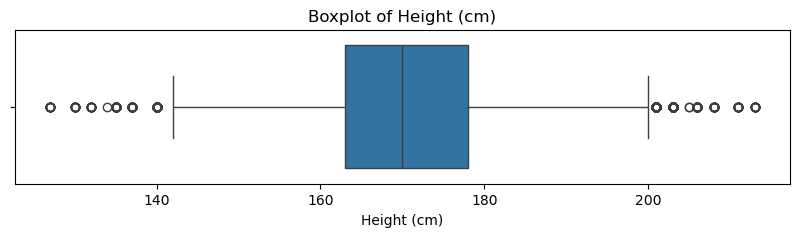

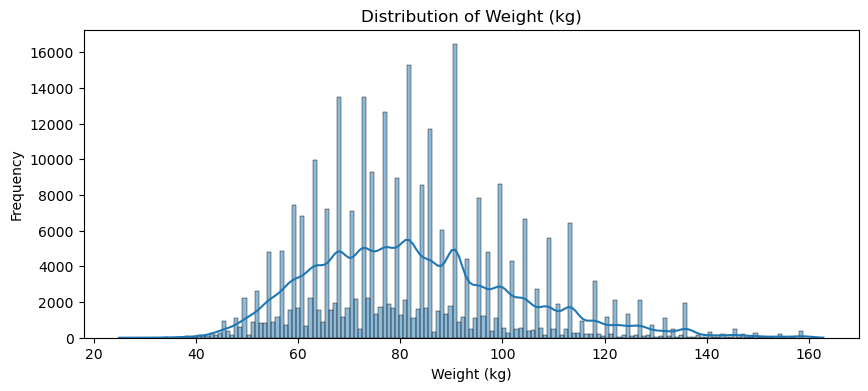

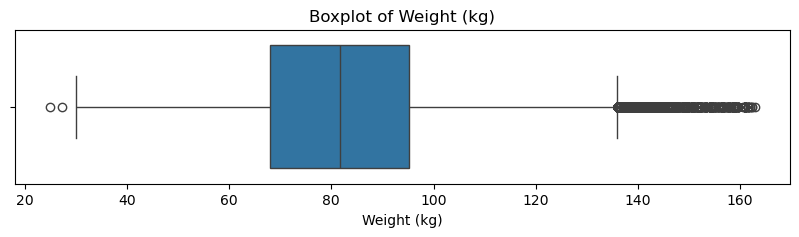

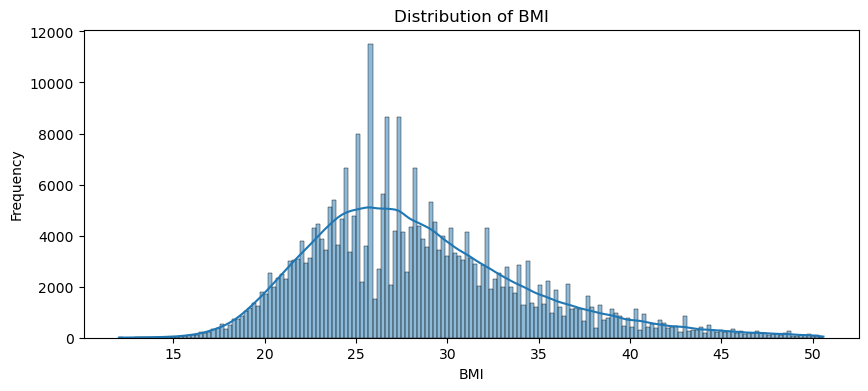

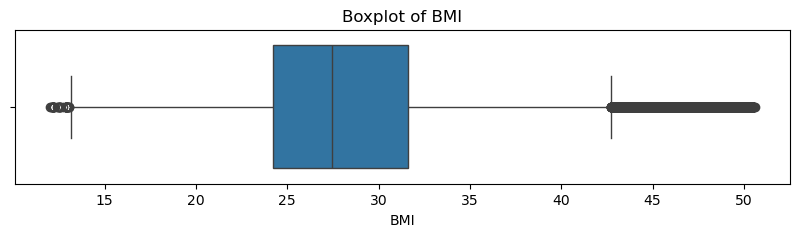

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = disease_df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    # Plot Histogram with KDE for the variable
    plt.figure(figsize=(10, 4))
    sns.histplot(disease_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot Boxplot for the variable
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=disease_df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

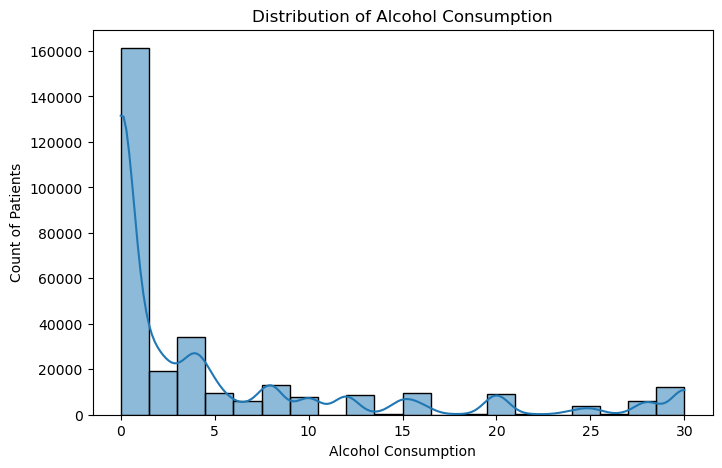

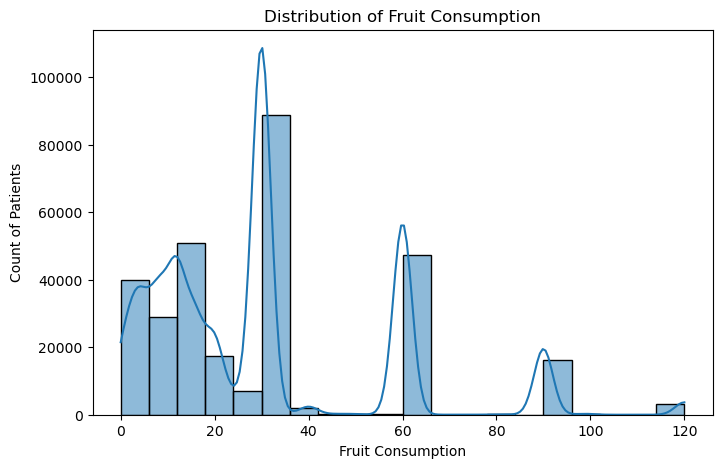

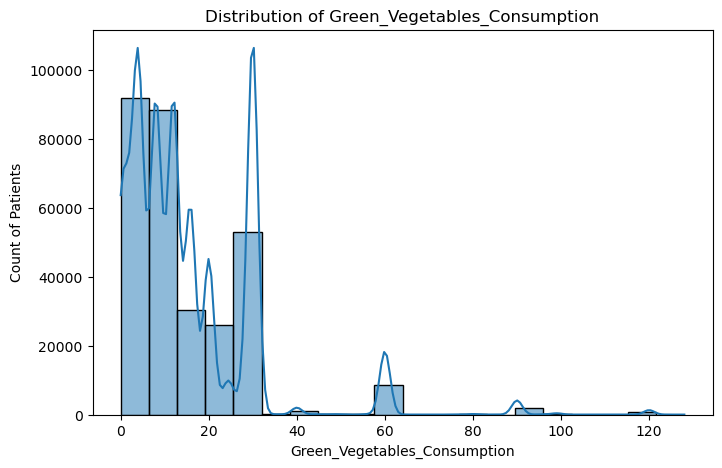

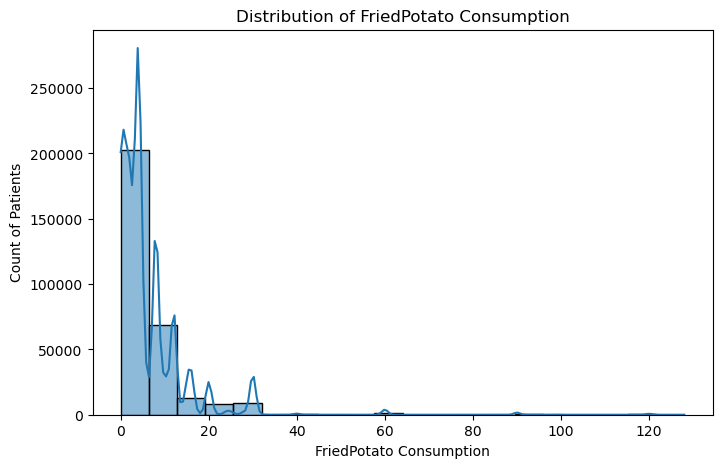

In [36]:
# List of columns to visualize
columns_to_plot = [
    'Alcohol Consumption', 
    'Fruit Consumption', 
    'Green_Vegetables_Consumption', 
    'FriedPotato Consumption'
]

# Plot a histogram for each column
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(disease_df[col], bins=20, kde=True)  # Use kde=True to add a smooth curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Patients')
    plt.show()

### Categorical Predictors

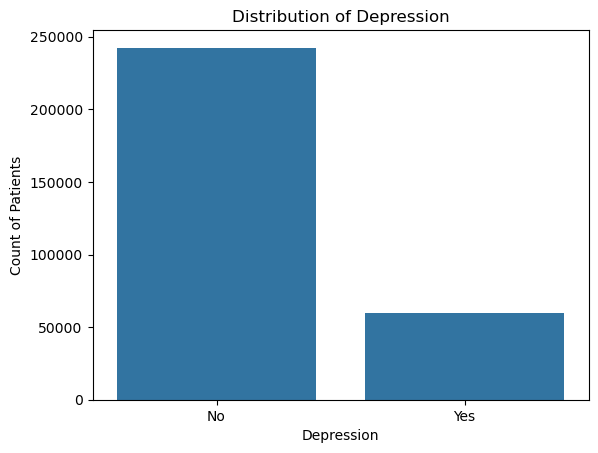

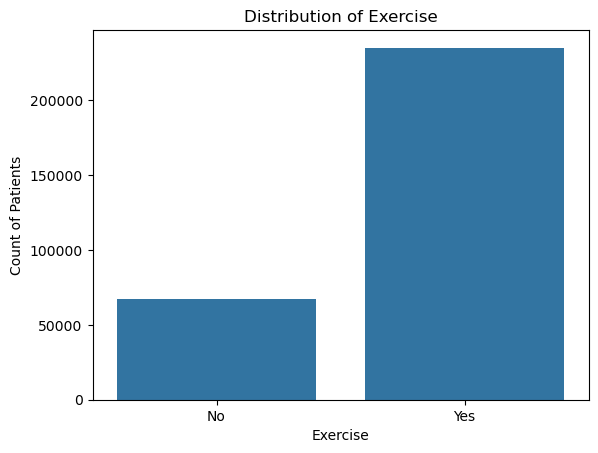

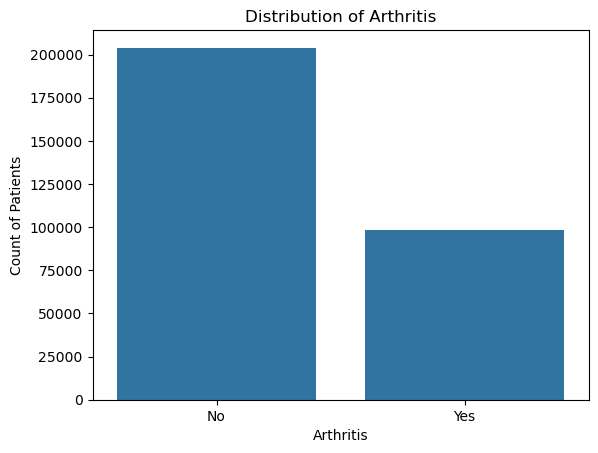

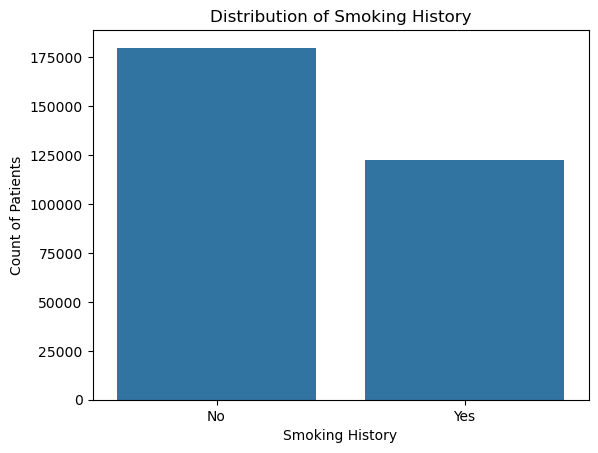

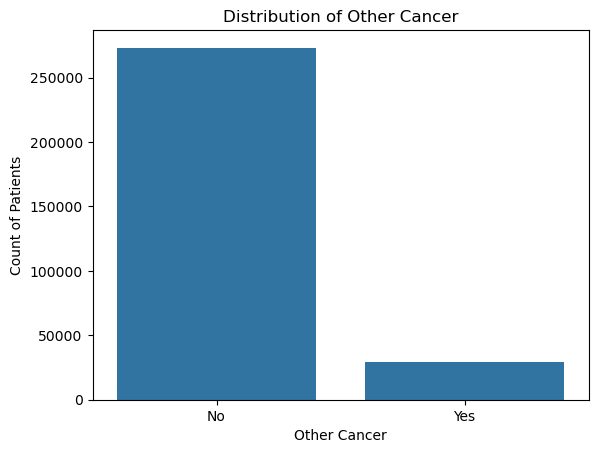

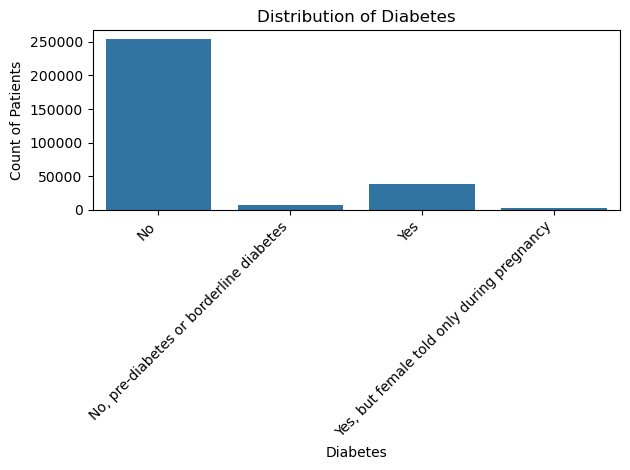

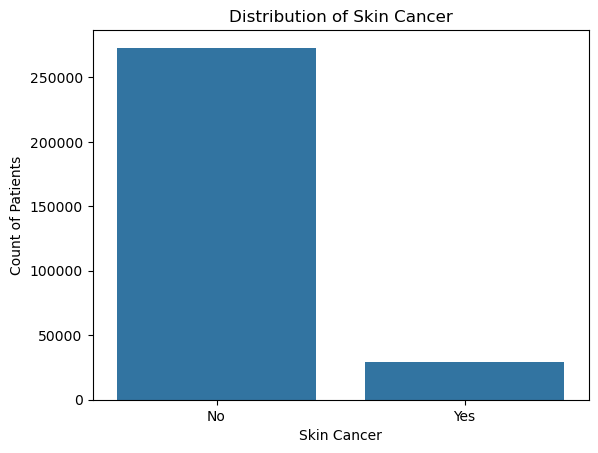

In [38]:
# List of categorical columns with "yes" and "no" values
binary_categorical_columns = [
    'Depression', "Exercise", 'Arthritis', 
    'Smoking History', "Other Cancer"
]  # Replace or update with columns that have "yes" or "no" values

for col in binary_categorical_columns:
    sns.countplot(x=disease_df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Patients')
    plt.show()

#Diabetes
# Plot for Diabetes column
sns.countplot(x=disease_df['Diabetes'])  # Replace 'Diabetes' with any other column if needed
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count of Patients')

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels, align them to the right, and adjust font size
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()
    
    
#Skin Cancer
# Ensure that only "Yes" and "No" remain in the 'Skin Cancer' column
#disease_df = disease_df[disease_df['Skin Cancer'].isin(['Yes', 'No'])]
# Plot the distribution for the cleaned 'Skin Cancer' column
sns.countplot(x=disease_df['Skin Cancer'])
plt.title('Distribution of Skin Cancer')
plt.xlabel('Skin Cancer')
plt.ylabel('Count of Patients')
plt.show()

C:\Users\Z20235\AppData\Local\Temp\ipykernel_29596\3978621045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Age Category', data=disease_df, order=disease_df['Age Category'].value_counts().index, palette="viridis")


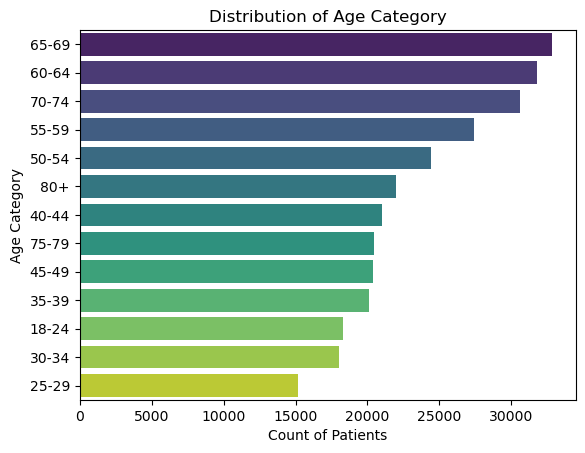

In [39]:

# Plot the distribution of Age Category with unique colors for each bar
sns.countplot(y='Age Category', data=disease_df, order=disease_df['Age Category'].value_counts().index, palette="viridis")
plt.title('Distribution of Age Category')
plt.xlabel('Count of Patients')
plt.ylabel('Age Category')
plt.show() 



# Response Variable

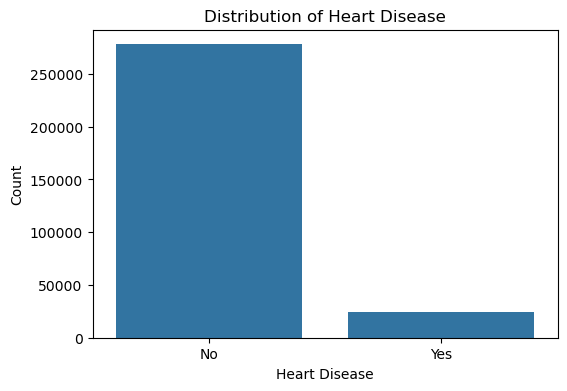

In [41]:
#Response Variable
plt.figure(figsize=(6, 4))
sns.countplot(x=disease_df['Heart Disease'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Dataset Division

Heart Disease
No     194655
Yes     17104
Name: count, dtype: int64
Heart Disease
No     41711
Yes     3666
Name: count, dtype: int64
Heart Disease
No     41712
Yes     3665
Name: count, dtype: int64


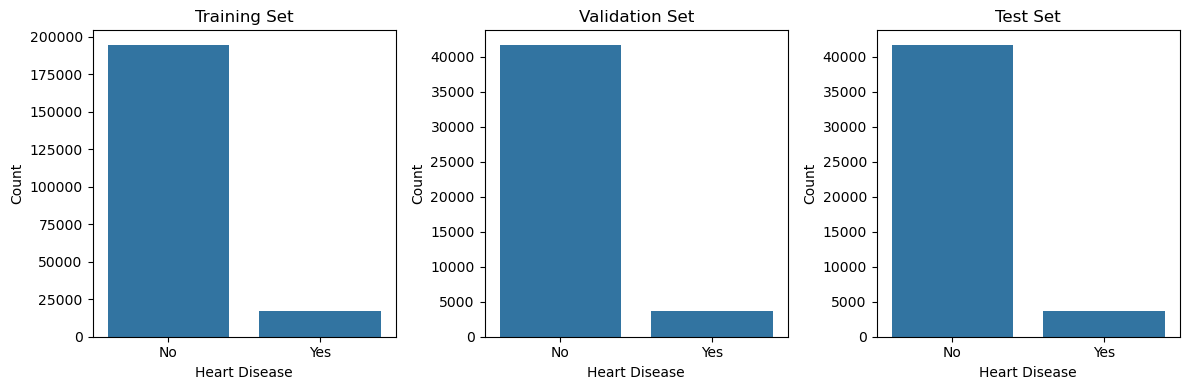

In [43]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#'Heart Disease' is the response variable

# Step 1: Split the dataset into training (70%) and remaining (30%)
train_df, remaining_df = train_test_split(disease_df, test_size=0.3, stratify=disease_df['Heart Disease'], random_state=42)

# Step 2: Split the remaining data into validation (15%) and test (15%)
val_df, test_df = train_test_split(remaining_df, test_size=0.5, stratify=remaining_df['Heart Disease'], random_state=42)

# Step 3: Calculate the number of observations for each class in each set
train_counts = train_df['Heart Disease'].value_counts()
val_counts = val_df['Heart Disease'].value_counts()
test_counts = test_df['Heart Disease'].value_counts()

print(train_counts)
print(val_counts)
print(test_counts)

# Step 4: Verify the distribution of the response variable in each set
plt.figure(figsize=(12, 4))

# Training set distribution
plt.subplot(1, 3, 1)
sns.countplot(x=train_df['Heart Disease'])
plt.title('Training Set')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Validation set distribution
plt.subplot(1, 3, 2)
sns.countplot(x=val_df['Heart Disease'])
plt.title('Validation Set')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Test set distribution
plt.subplot(1, 3, 3)
sns.countplot(x=test_df['Heart Disease'])
plt.title('Test Set')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# Machine learning algorithm and statistical tests

In [45]:
#!pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import ttest_ind, wilcoxon
import numpy as np
import pandas as pd

# Make sure 'disease_df' is loaded and processed before running this code

# Define categorical and numerical features based on your dataset
categorical_features = [
    'General_Health', 'Checkup', 'Exercise', 'Skin Cancer', 'Other Cancer', 
    'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age Category', 'Smoking History'
]
numerical_features = [
    'Height (cm)', 'Weight (kg)', 'BMI', 'Alcohol Consumption', 
    'Fruit Consumption', 'Green_Vegetables_Consumption', 'FriedPotato Consumption'
]

# Create a transformer to handle categorical and numerical variables
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = 'passthrough'  # Pass numerical data through without changes

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Separate features and target variable
X = disease_df.drop("Heart Disease", axis=1)
y = disease_df["Heart Disease"].map({"Yes": 1, "No": 0}).values  # Convert "Yes"/"No" to 1 and 0

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

# Handle potential NaN values
X_preprocessed = np.nan_to_num(X_preprocessed)  # Replace NaNs with 0 or another value if needed

# Stratified cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each technique
metrics_undersampling = {'accuracy': [], 'recall': [], 'precision': [], 'f1': []}
metrics_oversampling = {'accuracy': [], 'recall': [], 'precision': [], 'f1': []}

# Iterate over each split in cross-validation
for train_index, test_index in kf.split(X_preprocessed, y):
    X_train, X_test = X_preprocessed[train_index], X_preprocessed[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # NearMiss (undersampling)
    nm = NearMiss()
    X_undersampled, y_undersampled = nm.fit_resample(X_train, y_train)
    
    # Train logistic regression model on undersampled data
    model_undersampled = LogisticRegression(max_iter=1000, random_state=42)
    model_undersampled.fit(X_undersampled, y_undersampled)
    y_pred_undersampled = model_undersampled.predict(X_test)
    
    # Record metrics for undersampling
    metrics_undersampling['accuracy'].append(accuracy_score(y_test, y_pred_undersampled))
    metrics_undersampling['recall'].append(recall_score(y_test, y_pred_undersampled))
    metrics_undersampling['precision'].append(precision_score(y_test, y_pred_undersampled))
    metrics_undersampling['f1'].append(f1_score(y_test, y_pred_undersampled))
    
    # SMOTE (oversampling)
    smote = SMOTE(random_state=42)
    X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)
    
    # Train logistic regression model on oversampled data
    model_oversampled = LogisticRegression(max_iter=1000, random_state=42)
    model_oversampled.fit(X_oversampled, y_oversampled)
    y_pred_oversampled = model_oversampled.predict(X_test)
    
    # Record metrics for oversampling
    metrics_oversampling['accuracy'].append(accuracy_score(y_test, y_pred_oversampled))
    metrics_oversampling['recall'].append(recall_score(y_test, y_pred_oversampled))
    metrics_oversampling['precision'].append(precision_score(y_test, y_pred_oversampled))
    metrics_oversampling['f1'].append(f1_score(y_test, y_pred_oversampled))

# Calculate the average of each metric
print("Average metrics with undersampling (NearMiss):")
for metric in metrics_undersampling:
    print(f"{metric.capitalize()}: {np.mean(metrics_undersampling[metric])}")

print("\nAverage metrics with oversampling (SMOTE):")
for metric in metrics_oversampling:
    print(f"{metric.capitalize()}: {np.mean(metrics_oversampling[metric])}")

# Perform statistical tests for each metric
for metric in metrics_undersampling:
    print(f"\nResults for {metric.capitalize()}:")
    
    # T-test
    t_stat, p_value = ttest_ind(metrics_undersampling[metric], metrics_oversampling[metric])
    print(f"T-test - T-statistic: {t_stat}, P-value: {p_value}")
    if p_value < 0.05:
        print("Significant difference: Null hypothesis is rejected.")
    else:
        print("No significant difference: Null hypothesis is not rejected.")
    
    # Wilcoxon signed-rank test
    try:
        w_stat, w_p_value = wilcoxon(metrics_undersampling[metric], metrics_oversampling[metric])
        print(f"Wilcoxon test - W-statistic: {w_stat}, P-value: {w_p_value}")
        if w_p_value < 0.05:
            print("Significant difference: Null hypothesis is rejected.")
        else:
            print("No significant difference: Null hypothesis is not rejected.")
    except ValueError:
        print("Wilcoxon test could not be performed (requires paired samples of the same length).")

    # Permutation test
    def permutation_test(x, y, num_permutations=10000):
        observed_diff = np.mean(x) - np.mean(y)
        combined = np.concatenate([x, y])
        num_greater = 0
        for _ in range(num_permutations):
            np.random.shuffle(combined)
            new_x = combined[:len(x)]
            new_y = combined[len(x):]
            new_diff = np.mean(new_x) - np.mean(new_y)
            if abs(new_diff) >= abs(observed_diff):
                num_greater += 1
        return num_greater / num_permutations
    
    perm_p_value = permutation_test(metrics_undersampling[metric], metrics_oversampling[metric])
    print(f"Permutation test - P-value: {perm_p_value}")
    if perm_p_value < 0.05:
        print("Significant difference: Null hypothesis is rejected.")
    else:
        print("No significant difference: Null hypothesis is not rejected.")


C:\Users\Z20235\Downloads\Phyton\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Z20235\Downloads\Phyton\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Average metrics with undersampling (NearMiss):
Accuracy: 0.5171017309811536
Recall: 0.7705749948843872
Precision: 0.1182027673045321
F1: 0.20496167746355343

Average metrics with oversampling (SMOTE):
Accuracy: 0.7491975695212171
Recall: 0.7728667894413751
Precision: 0.21170667829301465
F1: 0.33236759956295076

Results for Accuracy:
T-test - T-statistic: -80.24517120719217, P-value: 6.485232387956322e-13
Significant difference: Null hypothesis is rejected.
Wilcoxon test - W-statistic: 0.0, P-value: 0.0625
No significant difference: Null hypothesis is not rejected.
Permutation test - P-value: 0.0016
Significant difference: Null hypothesis is rejected.

Results for Recall:
T-test - T-statistic: -0.5797275403198036, P-value: 0.578055096463875
No significant difference: Null hypothesis is not rejected.
Wilcoxon test - W-statistic: 4.0, P-value: 0.4375
No significant difference: Null hypothesis is not rejected.
Permutation test - P-value: 0.5681
No significant difference: Null hypothesis is

# Ensemble Algorithm - Random Forest


Metrics for Training Set:
Confusion Matrix:
[[194655      0]
 [     7 194648]]
Accuracy: 1.0000
Precision: 1.0000
Sensitivity (Recall): 1.0000
Specificity: 1.0000
AUC: 1.0000

Metrics for Validation Set:
Confusion Matrix:
[[41462   249]
 [ 3459   207]]
Accuracy: 0.9183
Precision: 0.4539
Sensitivity (Recall): 0.0565
Specificity: 0.9940
AUC: 0.8078

Metrics for Test Set:
Confusion Matrix:
[[41464   248]
 [ 3466   199]]
Accuracy: 0.9182
Precision: 0.4452
Sensitivity (Recall): 0.0543
Specificity: 0.9941
AUC: 0.8031


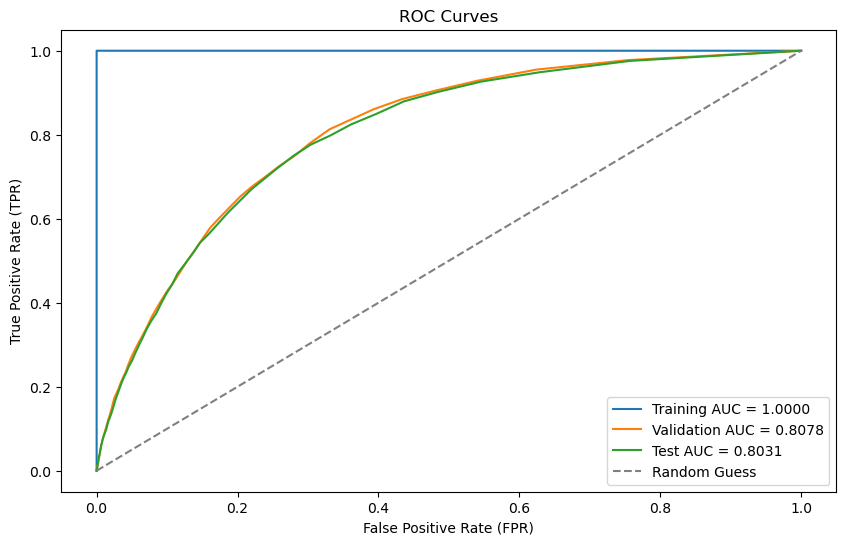

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Define categorical and numerical features
categorical_features = [
    'General_Health', 'Checkup', 'Exercise', 'Skin Cancer', 'Other Cancer', 
    'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age Category', 'Smoking History'
]
numerical_features = [
    'Height (cm)', 'Weight (kg)', 'BMI', 'Alcohol Consumption', 
    'Fruit Consumption', 'Green_Vegetables_Consumption', 'FriedPotato Consumption'
]

# Preprocess features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = np.nan_to_num(X_preprocessed)  # Handle NaNs if any

# Step 1: Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessed, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Step 2: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Step 4: Evaluate the model
def calculate_metrics(model, X, y, dataset_name):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    conf_matrix = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, pos_label=1)
    sensitivity = recall_score(y, y_pred, pos_label=1)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    auc = roc_auc_score(y, y_pred_proba)
    
    print(f"\nMetrics for {dataset_name} Set:")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"AUC: {auc:.4f}")
    
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{dataset_name} AUC = {auc:.4f}")
    return conf_matrix, accuracy, precision, sensitivity, specificity, auc
    
# Step 5: Metrics for Training, Validation, and Test Sets
plt.figure(figsize=(10, 6))
plt.title("ROC Curves")

# Training set
calculate_metrics(rf_model, X_train_balanced, y_train_balanced, "Training")

# Validation set
calculate_metrics(rf_model, X_val, y_val, "Validation")

# Test set
calculate_metrics(rf_model, X_test, y_test, "Test")

#Add the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix and ROC Curves

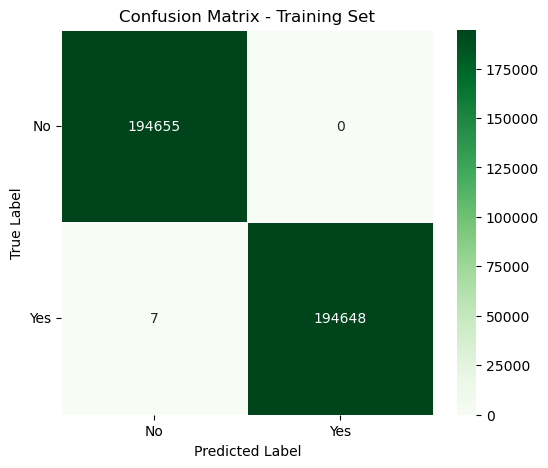

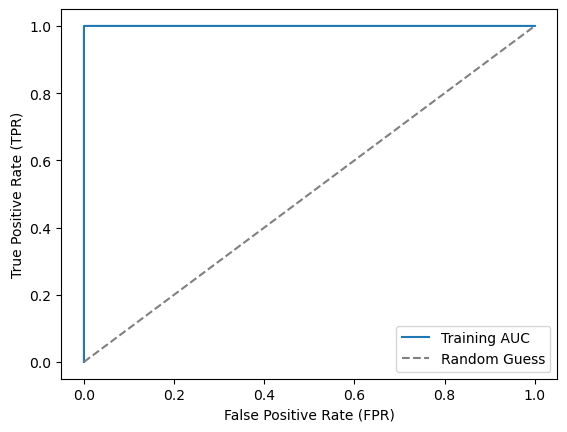

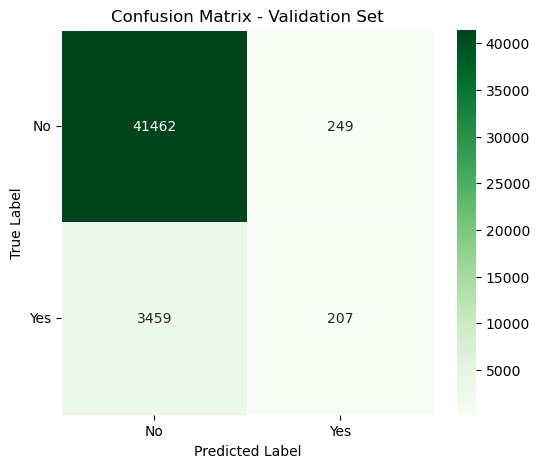

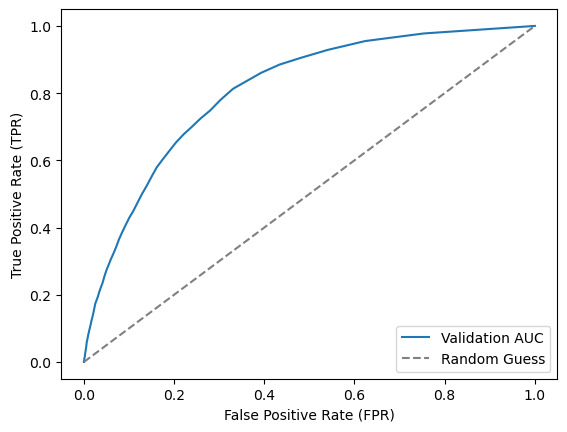

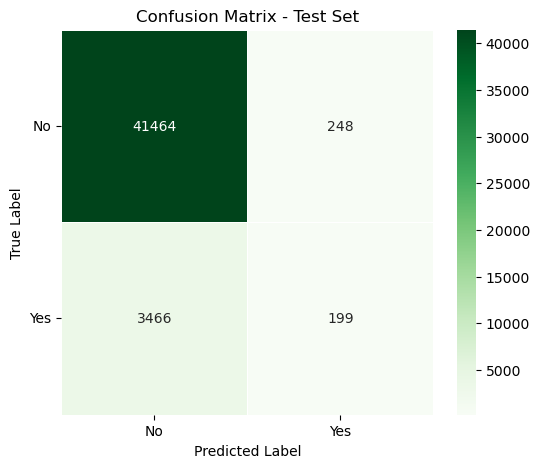

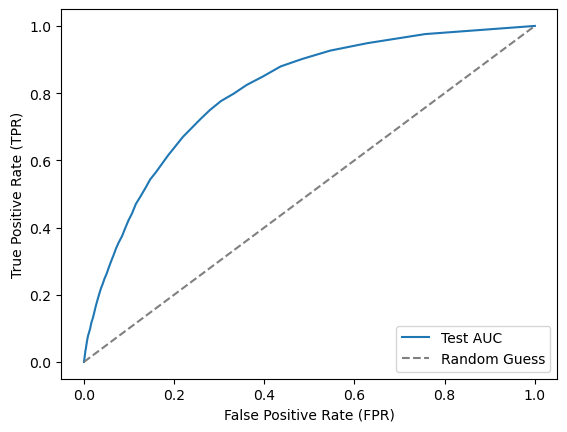

In [50]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical and numerical features
categorical_features = [
    'General_Health', 'Checkup', 'Exercise', 'Skin Cancer', 'Other Cancer', 
    'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age Category', 'Smoking History'
]
numerical_features = [
    'Height (cm)', 'Weight (kg)', 'BMI', 'Alcohol Consumption', 
    'Fruit Consumption', 'Green_Vegetables_Consumption', 'FriedPotato Consumption'
]

# Preprocess features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = np.nan_to_num(X_preprocessed)  # Handle NaNs if any

# Step 1: Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessed, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Step 2: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    """
    Plots a confusion matrix using Seaborn.
    """
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True, linewidths=0.5)
    plt.title(f'Confusion Matrix - {dataset_name} Set')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=["No", "Yes"], rotation=0)
    plt.yticks(ticks=[0.5, 1.5], labels=["No", "Yes"], rotation=0)
    plt.show()
    

# Training set
y_train_pred = rf_model.predict(X_train_balanced)
y_train_proba = rf_model.predict_proba(X_train_balanced)[:, 1]
plot_confusion_matrix(y_train_balanced, y_train_pred, "Training")
fpr_train, tpr_train, _ = roc_curve(y_train_balanced, y_train_proba)
plt.plot(fpr_train, tpr_train, label="Training AUC")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

# Validation set
y_val_pred = rf_model.predict(X_val)
y_val_proba = rf_model.predict_proba(X_val)[:, 1]
plot_confusion_matrix(y_val, y_val_pred, "Validation")
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
plt.plot(fpr_val, tpr_val, label="Validation AUC")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

# Test set
y_test_pred = rf_model.predict(X_test)
y_test_proba = rf_model.predict_proba(X_test)[:, 1]
plot_confusion_matrix(y_test, y_test_pred, "Test")
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr_test, tpr_test, label="Test AUC")


# Finalize ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()


# The most important predictor variables

Top Predictor Variables for Cardiovascular Disease:
                     Feature  Importance
15             Arthritis_Yes    0.136622
30       Smoking History_Yes    0.099518
13              Diabetes_Yes    0.097192
3   General_Health_Very Good    0.068283
0        General_Health_Fair    0.058993
29          Age Category_80+    0.052606
8               Exercise_Yes    0.049747
1        General_Health_Good    0.042291
28        Age Category_75-79    0.031264
27        Age Category_70-74    0.031220


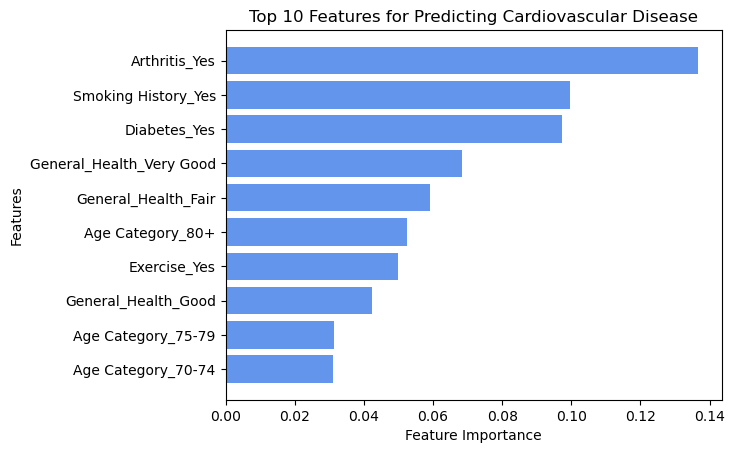

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names from the preprocessor
categorical_features_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.append(categorical_features_encoded, numerical_features)

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Combine feature names and their importance scores into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Predictor Variables for Cardiovascular Disease:")
print(feature_importance_df.head(10))

# Plot the top 10 most important features
plt.figure
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='cornflowerblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features for Predicting Cardiovascular Disease')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


## 5.2 At least 1 algorithm must be a model not seen in class (you must research and understand how the model mathematically works and performs the prediction, include a good description about these points in the presentation and report).


Model selected Gaussian Naive Bayes


Metrics for Training Set:
Confusion Matrix:
[[ 98900  95755]
 [ 21701 172954]]
Accuracy: 0.6983
Precision: 0.6436
Sensitivity (Recall): 0.8885
Specificity: 0.5081
AUC: 0.7940

Metrics for Validation Set:
Confusion Matrix:
[[21273 20438]
 [  559  3107]]
Accuracy: 0.5373
Precision: 0.1320
Sensitivity (Recall): 0.8475
Specificity: 0.5100
AUC: 0.7862

Metrics for Test Set:
Confusion Matrix:
[[21167 20545]
 [  552  3113]]
Accuracy: 0.5351
Precision: 0.1316
Sensitivity (Recall): 0.8494
Specificity: 0.5075
AUC: 0.7854


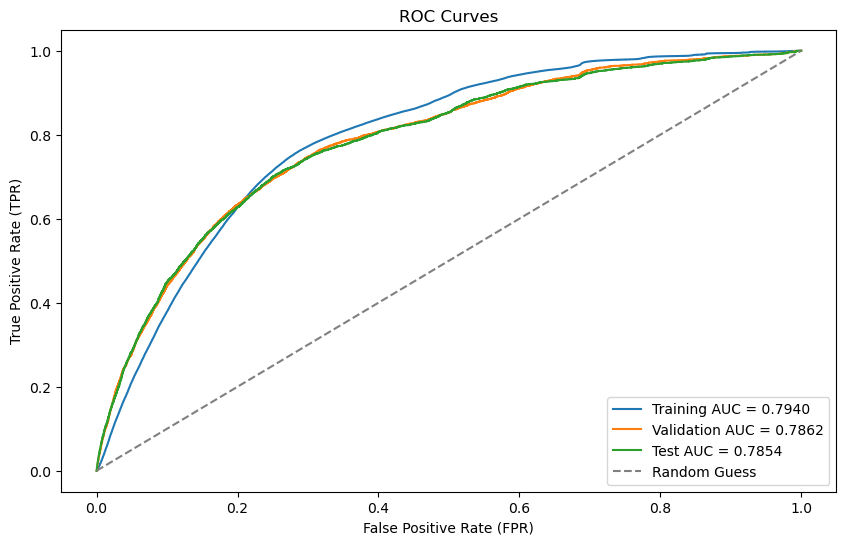

In [55]:
# First we will start importing the libraries 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# As we created in the last algorithm we will define the categorical and numerical features
categorical_featuresGNB = ['General_Health', 'Checkup', 'Exercise', 'Skin Cancer', 'Other Cancer', 'Depression', 'Diabetes',
                        'Arthritis', 'Sex', 'Age Category', 'Smoking History']
numerical_featuresGNB = ['Height (cm)', 'Weight (kg)', 'BMI', 'Alcohol Consumption', 'Fruit Consumption', 'Green_Vegetables_Consumption', 
                      'FriedPotato Consumption']

# And the first step will be the preprocess of the features
preprocessorGNB = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_featuresGNB),
        ('num', 'passthrough', numerical_featuresGNB)
    ]
)

# We apply preprocessing
X_preprocessedGNB = preprocessorGNB.fit_transform(X)
X_preprocessedGNB = np.nan_to_num(X_preprocessedGNB)  # Handle NaNs if any

# Dataset separation between training, validation and test set
X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessedGNB, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# We will use SMOTE to balance the data 
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Once we have our data balanced we will proceed to train the model using the Gaussian Naive Bayes model
GNB = GaussianNB()
# Here we are taking the balanced data to train the model
GNB.fit(X_train_balanced, y_train_balanced)

# To evaluate if the model worked we will do the following evaluation

def calculate_metrics(model, X, y, dataset_name):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # The first metric that we will use will be the confusion matrix   
    conf_matrix = confusion_matrix(y, y_pred)

    # The second one will be accuracy
    accuracy = accuracy_score(y, y_pred)
    # The third one will be precision
    precision = precision_score(y, y_pred, pos_label=1)
    # The fourth one will be sensitivity, this will be the most important metric for the evaluation of our project
    sensitivity = recall_score(y, y_pred, pos_label=1)
    # The fifth one will be specificity
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    # This will help us to calculate the area above the ROC curve, that helps us to understand the capacity of distinction of the model
    auc = roc_auc_score(y, y_pred_proba)
    
    print(f"\nMetrics for {dataset_name} Set:")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"AUC: {auc:.4f}")
    
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{dataset_name} AUC = {auc:.4f}")
    return conf_matrix, accuracy, precision, sensitivity, specificity, auc
    
# To know how good was the model in the three sets we will see the AUC in the three of them and generate a graphic
plt.figure(figsize=(10, 6))
plt.title("ROC Curves")

# Training set
calculate_metrics(GNB, X_train_balanced, y_train_balanced, "Training")

# Validation set
calculate_metrics(GNB, X_val, y_val, "Validation")

# Test set
calculate_metrics(GNB, X_test, y_test, "Test")

# Add the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()


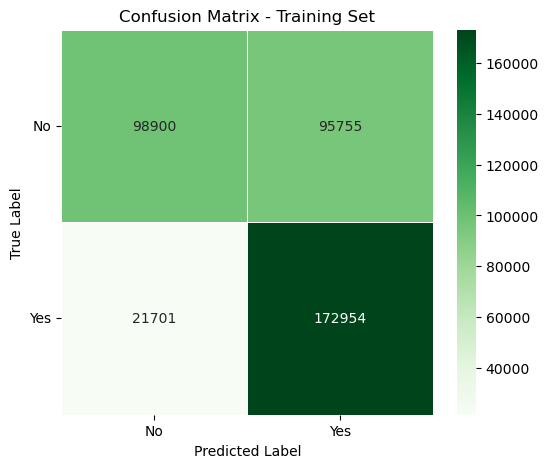

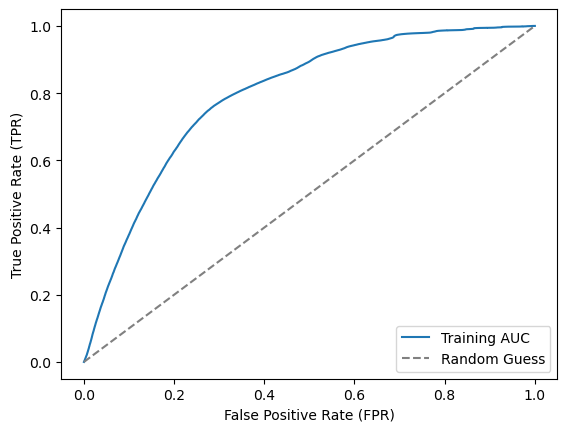

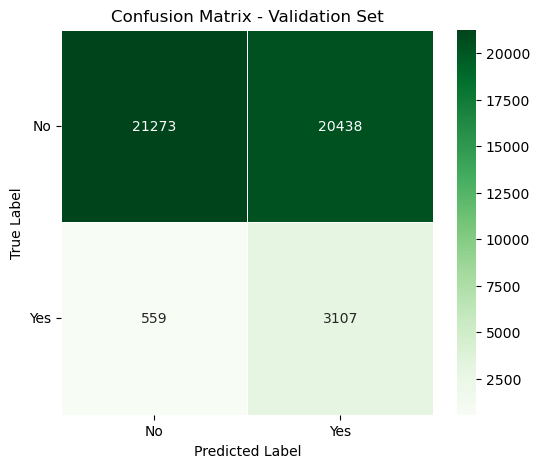

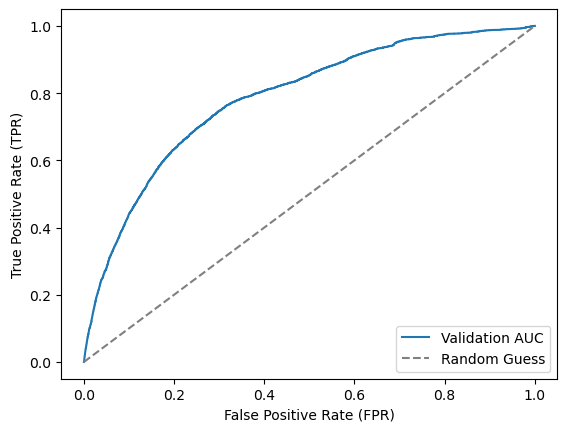

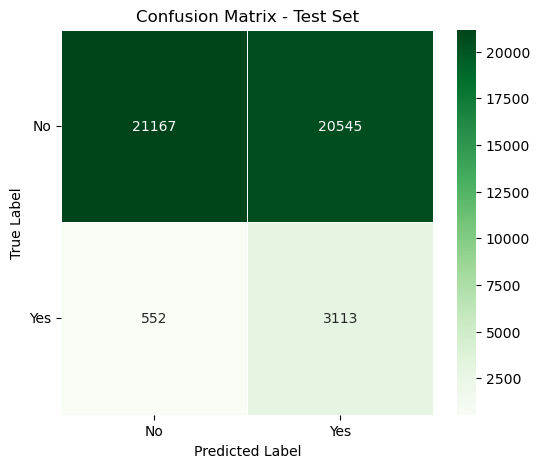

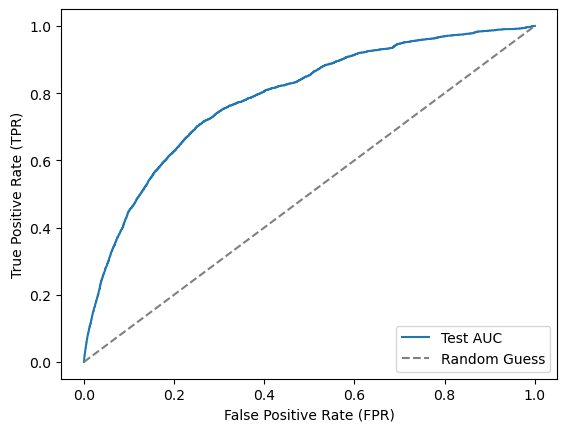

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define categorical and numerical features
categorical_features = [
    'General_Health', 'Checkup', 'Exercise', 'Skin Cancer', 'Other Cancer', 
    'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age Category', 'Smoking History'
]
numerical_features = [
    'Height (cm)', 'Weight (kg)', 'BMI', 'Alcohol Consumption', 
    'Fruit Consumption', 'Green_Vegetables_Consumption', 'FriedPotato Consumption'
]

# Preprocess features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = np.nan_to_num(X_preprocessed)  # Handle NaNs if any

# Step 1: Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessed, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Step 2: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 3: Train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    """
    Plots a confusion matrix using Seaborn.
    """
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True, linewidths=0.5)
    plt.title(f'Confusion Matrix - {dataset_name} Set')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=["No", "Yes"], rotation=0)
    plt.yticks(ticks=[0.5, 1.5], labels=["No", "Yes"], rotation=0)
    plt.show()

# Step 4: Metrics and plots for Training, Validation, and Test Sets
# Training set
y_train_pred = nb_model.predict(X_train_balanced)
y_train_proba = nb_model.predict_proba(X_train_balanced)[:, 1]
plot_confusion_matrix(y_train_balanced, y_train_pred, "Training")
fpr_train, tpr_train, _ = roc_curve(y_train_balanced, y_train_proba)
plt.plot(fpr_train, tpr_train, label="Training AUC")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

# Validation set
y_val_pred = nb_model.predict(X_val)
y_val_proba = nb_model.predict_proba(X_val)[:, 1]
plot_confusion_matrix(y_val, y_val_pred, "Validation")
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
plt.plot(fpr_val, tpr_val, label="Validation AUC")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

# Test set
y_test_pred = nb_model.predict(X_test)
y_test_proba = nb_model.predict_proba(X_test)[:, 1]
plot_confusion_matrix(y_test, y_test_pred, "Test")
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr_test, tpr_test, label="Test AUC")

# Finalize ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()
